In [1]:
"""Tool to plot infer some analysis on DSC thermograms"""
from dataclasses import dataclass, field
from os import listdir
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv, concat
from sklearn.linear_model import LinearRegression
#
import numpy as np
from scipy import sparse
from scipy.sparse.linalg import spsolve

In [2]:
# Global variables
SHOW_PLOTS = True


@dataclass
class Measurment:
    """Class to represent a measurment"""
    filename: str
    data: DataFrame = field(init=False)

    def __post_init__(self):
        self.data = read_csv(self.filename, sep='\t', header=0)
        self.data.columns = ['Temperature', self.filename]

    def clean(self, **kwargs):
        """Remove all rows with NaN"""
        self.data = self.data.astype(float)
        self.data = self.data[self.data["Temperature"] > 25]
        self.data = self.data[self.data["Temperature"] < 85]
        self.data = self.data.dropna()
        self.data = self.data.groupby(by='Temperature').mean()
        self.baseline_remove(**kwargs)

    def baseline_remove(self, **kwargs):
        """Remove baseline"""
        print(len(self.data))
        # apply baseline to every column
        for column in self.data.columns:
            if False:
                self.data[column +
                          "nwe"] = baseline_als(self.data[column], **kwargs)
            else:
                self.data[column] = self.data[column] - \
                    baseline_als(self.data[column], **kwargs)
            # self.data[column+"nwe"] = baseline_als(self.data[column])
            pass


def baseline_als(y, lam, p, niter):

    L = len(y)
    D = sparse.diags([1, -2, 1], [0, -1, -2], shape=(L, L-2))
    w = np.ones(L)
    for i in range(niter):
        W = sparse.spdiags(w, 0, L, L)
        Z = W + lam * D.dot(D.transpose())
        z = spsolve(Z, w*y)
        w = p * (y > z) + (1-p) * (y < z)
    return z


def PlotterSingle(namedir, N, cooling_or_heating, **kwargs):

    measurments = []
    exp = DataFrame()
    for filename in listdir(namedir):
        measurments.append(Measurment(namedir+"/"+filename))
        measurments[-1].clean(**kwargs)
        exp = concat([exp, measurments[-1].data], axis=1)
        exp = exp.dropna()

    if SHOW_PLOTS:
        exp.plot(legend=False, alpha=1,
                 linewidth=0.4, figsize=(7, 4))
    mean = exp.mean(axis=1)
    mean.plot(color="black", legend=False, linewidth=1.5,
              figsize=(10, 5), label="mean")
    plt.grid()
    std = exp.std(axis=1)
    plt.fill_between(mean.index, mean-std, mean+std,
                     color="C0", alpha=0.5, label="std")
    plt.xlabel("Temperature [°C]")
    plt.ylabel("Heat flow [mW]")
    plt.title("DSC thermogram oleogel RBX/RSO "+str(N)+"% "+cooling_or_heating)
    plt.tight_layout()

    plt.legend()
    plt.savefig(namedir+".png", dpi=1000)


def PlotterMultiple(namedir, displacement, cooling_or_heating,  **kwargs):

    for N in [2, 4, 6, 8]:
        namedir = str(N)+"perc"
        measurments = []
        exp = DataFrame()
        for filename in listdir(namedir):
            measurments.append(Measurment(namedir+"/"+filename))
            measurments[-1].clean(**kwargs)
            exp = concat([exp, measurments[-1].data], axis=1)
            exp = exp.dropna()

        exp = exp+displacement*(N/2-1)

        # exp.plot(color = "gray", legend = False, alpha = 0.5, linewidth = 0.1, figsize=(10, 5))
        mean = exp.mean(axis=1)
        mean.plot(legend=False, linewidth=1, figsize=(7, 4), label=str(N)+"%")
        std = exp.std(axis=1)
        plt.fill_between(mean.index, mean-std, mean+std, alpha=0.5)

    plt.xlabel("Temperature [°C]")
    plt.ylabel("Heat flow endo up [mW]")
    plt.title("DSC thermogram oleogel RBX/RSO "+cooling_or_heating)
    plt.tight_layout()
    plt.grid()
    plt.legend(loc="upper right")
    plt.savefig(cooling_or_heating + namedir+".png", dpi=1000)

In [3]:
p = 0.001
lam = 10**10
niter = 10
kwargs = {"p": p, "lam": lam, "niter": niter}
cooling_or_heating = "heating"

SHOW_PLOTS = True

In [4]:
N = 2
namedir = str(N)+"perc"
PlotterSingle(namedir, N, cooling_or_heating, **kwargs)

FileNotFoundError: [Errno 2] No such file or directory: '2perc'

5997
5999
5997
5998


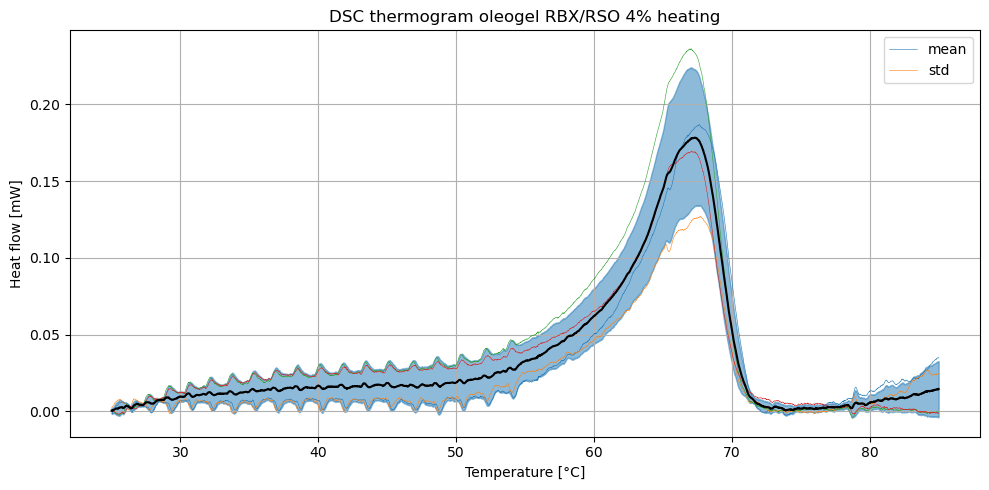

In [40]:
N = 4
namedir = str(N)+"perc"

PlotterSingle(namedir, N, cooling_or_heating, **kwargs)

5998
5998
5998
5999


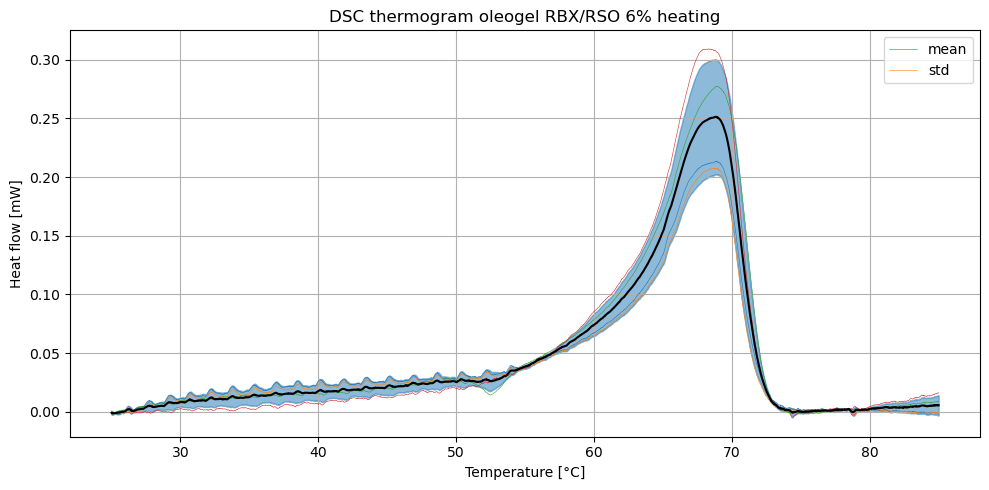

In [41]:
N = 6
namedir = str(N)+"perc"

PlotterSingle(namedir, N, cooling_or_heating, **kwargs)

5997
5997
5998
5998


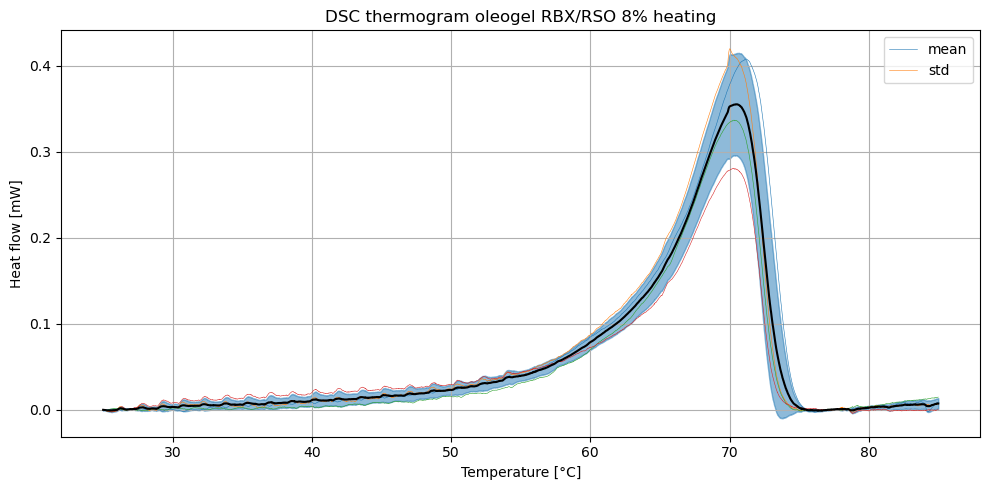

In [42]:
N = 8
namedir = str(N)+"perc"

PlotterSingle(namedir, N, cooling_or_heating, **kwargs)

# Together

5990
5998
5998
5996
5997
5999
5997
5998
5998
5998
5998
5999
5997
5997
5998
5998


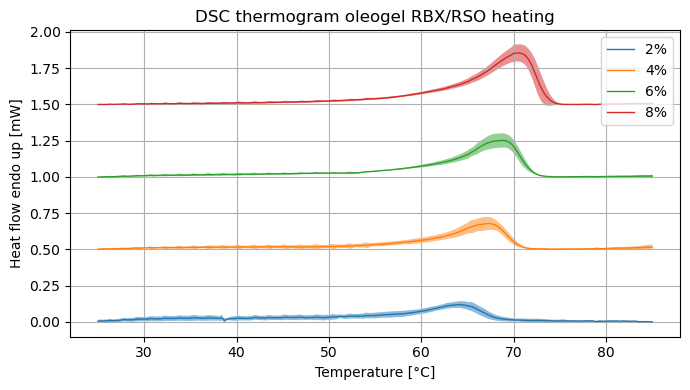

In [43]:
displacement = 0.5

PlotterMultiple(namedir, displacement, cooling_or_heating, **kwargs)